In [320]:
library(tidyverse)
library(cansim)
library(readr)
library(vroom)
library(lubridate)
library(tseries)
library(strucchange)
library(purrr) 
library(vars)
library(fredr)

In [321]:
fredr_set_key('b43b23bac4c602369428a1a4316f23d4')

In [322]:
exc_rate <- fredr(
  series_id = "DEXCAUS",
  observation_start = as.Date("2000-01-01"),
  observation_end = as.Date("2025-08-01"),
  frequency = "m", # monthly
  units = "chg" # change over previous value
)

In [ ]:
trade_commodities <- fredr(
  series_id = "XTNTVA01CAM664S",
  observation_start = as.Date("2000-01-01"),
  observation_end = as.Date("2025-08-01"),
  frequency = "m", # monthly
  units = "chg" # change over previous value
)

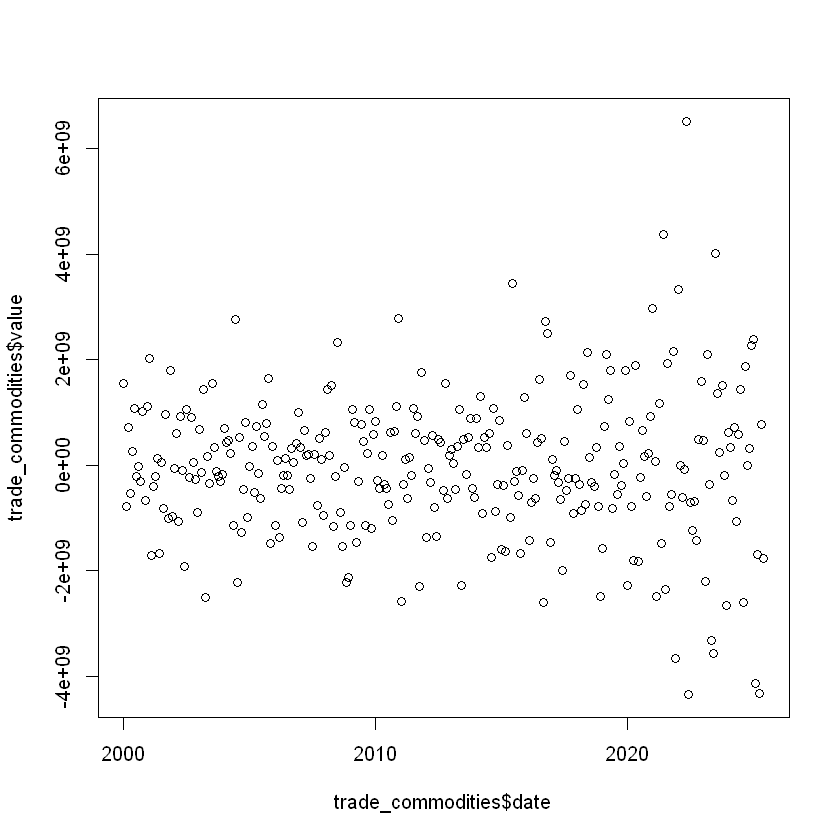

In [350]:
plot(trade_commodities$date, trade_commodities$value)

In [349]:
print(exc_rate)
print(trade_commodities)

# A tibble: 308 × 5
   date       series_id     value realtime_start realtime_end
   <date>     <chr>         <dbl> <date>         <date>      
 1 2000-01-01 DEXCAUS   -0.0236   2025-08-20     2025-08-20  
 2 2000-02-01 DEXCAUS    0.00261  2025-08-20     2025-08-20  
 3 2000-03-01 DEXCAUS    0.00956  2025-08-20     2025-08-20  
 4 2000-04-01 DEXCAUS    0.00810  2025-08-20     2025-08-20  
 5 2000-05-01 DEXCAUS    0.0269   2025-08-20     2025-08-20  
 6 2000-06-01 DEXCAUS   -0.0187   2025-08-20     2025-08-20  
 7 2000-07-01 DEXCAUS    0.000740 2025-08-20     2025-08-20  
 8 2000-08-01 DEXCAUS    0.00503  2025-08-20     2025-08-20  
 9 2000-09-01 DEXCAUS    0.00362  2025-08-20     2025-08-20  
10 2000-10-01 DEXCAUS    0.0260   2025-08-20     2025-08-20  
# ℹ 298 more rows
# A tibble: 306 × 5
   date       series_id            value realtime_start realtime_end
   <date>     <chr>                <dbl> <date>         <date>      
 1 2000-01-01 XTNTVA01CAM664S 1547700000 2025-08-20     2025

In [324]:
gdp_vec <- get_cansim_vector_for_latest_periods("v65201210", periods = 300)
cpi_vec <- get_cansim_vector_for_latest_periods("v108785715", periods = 300)
exc_vec <- get_cansim_vector_for_latest_periods("v111666275", periods = 300)
oil_vec <- get_cansim_vector_for_latest_periods('v1352087861',  periods = 300)
unemp_vec <- get_cansim_vector_for_latest_periods('v2062815', periods = 300)
ulc_vec <- get_cansim_vector_for_latest_periods('v29509282',periods = 300)


Reading CANSIM NDM vectors from temporary cache



Reading CANSIM NDM vectors from temporary cache

Reading CANSIM NDM vectors from temporary cache

Reading CANSIM NDM vectors from temporary cache

Reading CANSIM NDM vectors from temporary cache

Reading CANSIM NDM vectors from temporary cache



In [325]:
monthly_real_return_bond <- get_cansim_vector_for_latest_periods('v122553',periods = 300)
monthly_convetional_bond <- get_cansim_vector_for_latest_periods('v122543',periods = 300)

Reading CANSIM NDM vectors from temporary cache

Reading CANSIM NDM vectors from temporary cache



In [326]:
monthly_real_return_bond <- monthly_real_return_bond|>
dplyr::select(Date, VALUE)

monthly_convetional_bond <- monthly_convetional_bond|>
dplyr::select(Date, VALUE)

break_even_df <- monthly_convetional_bond |>
  inner_join(monthly_real_return_bond, by = "Date", suffix = c("_conventional", "_real_return")) |>
  mutate(break_even_inflation_rate = VALUE_conventional - VALUE_real_return) |>
  dplyr::select(Date, break_even_inflation_rate)

  glimpse(
break_even_df)


Rows: 300
Columns: 2
$ Date                      <date> 2000-08-01, 2000-09-01, 2000-10-01, 2000-11…
$ break_even_inflation_rate <dbl> 2.10, 2.15, 2.20, 2.03, 1.93, 2.03, 1.97, 1.…


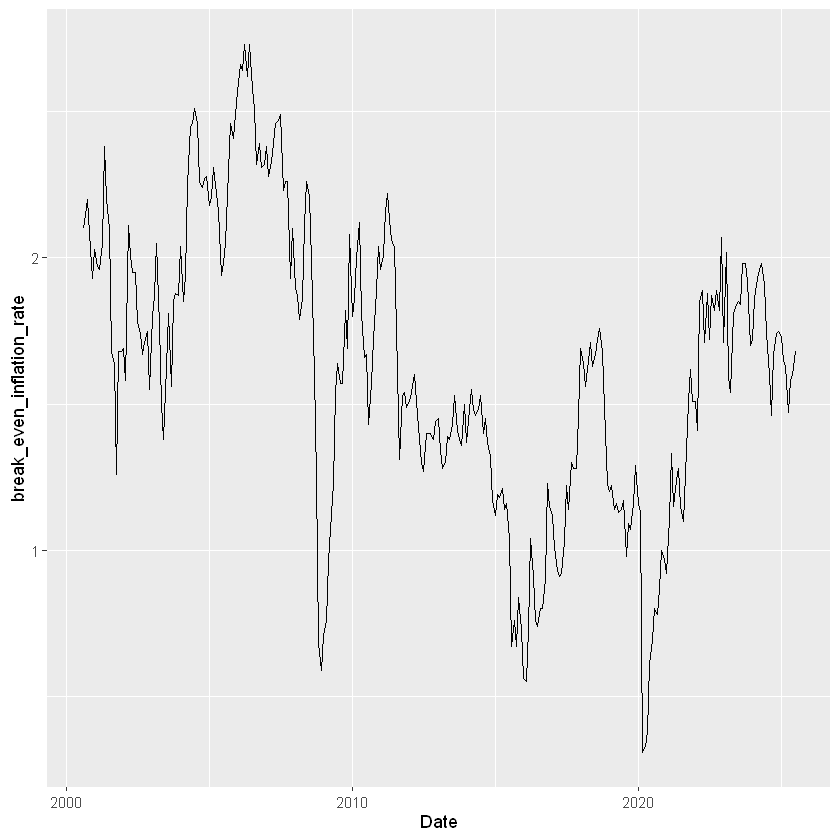

In [327]:
plot <- break_even_df|>
ggplot(aes(x=Date, y=break_even_inflation_rate))+geom_line()

plot

In [ ]:
print(gdp_vec$Date, 10)
print(cpi_vec$Date, 10)
print(exc_vec$Date, 10)
print(oil_vec$Date, 10)
print()

 [1] "2000-06-01" "2000-07-01" "2000-08-01" "2000-09-01" "2000-10-01"
 [6] "2000-11-01" "2000-12-01" "2001-01-01" "2001-02-01" "2001-03-01"
 [ reached 'max' / getOption("max.print") -- omitted 290 entries ]
 [1] "2000-08-01" "2000-09-01" "2000-10-01" "2000-11-01" "2000-12-01"
 [6] "2001-01-01" "2001-02-01" "2001-03-01" "2001-04-01" "2001-05-01"
 [ reached 'max' / getOption("max.print") -- omitted 290 entries ]
 [1] "2000-08-01" "2000-09-01" "2000-10-01" "2000-11-01" "2000-12-01"
 [6] "2001-01-01" "2001-02-01" "2001-03-01" "2001-04-01" "2001-05-01"
 [ reached 'max' / getOption("max.print") -- omitted 290 entries ]
 [1] "2000-08-01" "2000-09-01" "2000-10-01" "2000-11-01" "2000-12-01"
 [6] "2001-01-01" "2001-02-01" "2001-03-01" "2001-04-01" "2001-05-01"
 [ reached 'max' / getOption("max.print") -- omitted 290 entries ]


In [329]:
start_date <- "2000-01-01"

# --- GDP ---
gdp_monthly <- gdp_vec |>
  dplyr::select(Date, VALUE) |>
  # Create a 'month' column and filter
  dplyr::mutate(month = lubridate::floor_date(Date, "month")) |>
  dplyr::filter(month >= start_date) |>
  # Calculate month-over-month percent change
  dplyr::mutate(
    delta_gdp = (log(VALUE) - log(dplyr::lag(VALUE, 1))) * 100
  ) |>
  dplyr::select(month, delta_gdp) |>
  tidyr::drop_na()

# --- Break-even Inflation Rate ---
bond_monthly <- break_even_df |>
  dplyr::select(Date, break_even_inflation_rate) |>
  dplyr::mutate(month = lubridate::floor_date(Date, "month")) |>
  dplyr::filter(month >= start_date) |>
  dplyr::mutate(
    delta_bond = (log(break_even_inflation_rate) - log(dplyr::lag(break_even_inflation_rate, 1))) * 100
  ) |>
  dplyr::select(month, delta_bond) |>
  tidyr::drop_na()

# --- Oil ---
oil_monthly <- oil_vec |>
  dplyr::select(Date, VALUE) |>
  dplyr::mutate(month = lubridate::floor_date(Date, "month")) |>
  dplyr::filter(month >= start_date) |>
  dplyr::mutate(
    delta_oil = (log(VALUE) - log(dplyr::lag(VALUE, 1))) * 100
  ) |>
  dplyr::select(month, delta_oil) |>
  tidyr::drop_na()

# --- ULC (if you decide to use it, assuming it's monthly) ---
# ulc_monthly <- ulc_vec |>
#   dplyr::select(Date, VALUE) |>
#   dplyr::mutate(month = lubridate::floor_date(Date, "month")) |>
#   dplyr::filter(month >= start_date) |>
#   dplyr::mutate(
#     delta_ulc = (log(VALUE) - log(dplyr::lag(VALUE, 1))) * 100
#   ) |>
#   dplyr::select(month, delta_ulc) |>
#   tidyr::drop_na()

# --- Function to combine the dataframes ---
combine_processed_dfs <- function(...) {
  list_of_dfs <- list(...)
  # Join by 'month' instead of 'quarter'
  combined_df <- purrr::reduce(list_of_dfs, dplyr::inner_join, by = "month")
  return(combined_df)
}

# --- Combine all the monthly dataframes ---
final_monthly_df <- combine_processed_dfs(
  gdp_monthly,
  bond_monthly,
  oil_monthly
  # Add other monthly dataframes here, e.g., ulc_monthly
)

# Check the result
glimpse(final_monthly_df)

Rows: 232
Columns: 4
$ month      <date> 2006-02-01, 2006-03-01, 2006-04-01, 2006-05-01, 2006-06-01…
$ delta_gdp  <dbl> 0.21771034, 0.22756164, 0.02124890, 0.04712989, -0.16157716…
$ delta_bond <dbl> 3.442022e+00, -7.547206e-01, 3.352269e+00, -4.112729e+00, 4…
$ delta_oil  <dbl> -7.65400771, 5.84832934, 12.95040010, -1.51805572, -0.09564…


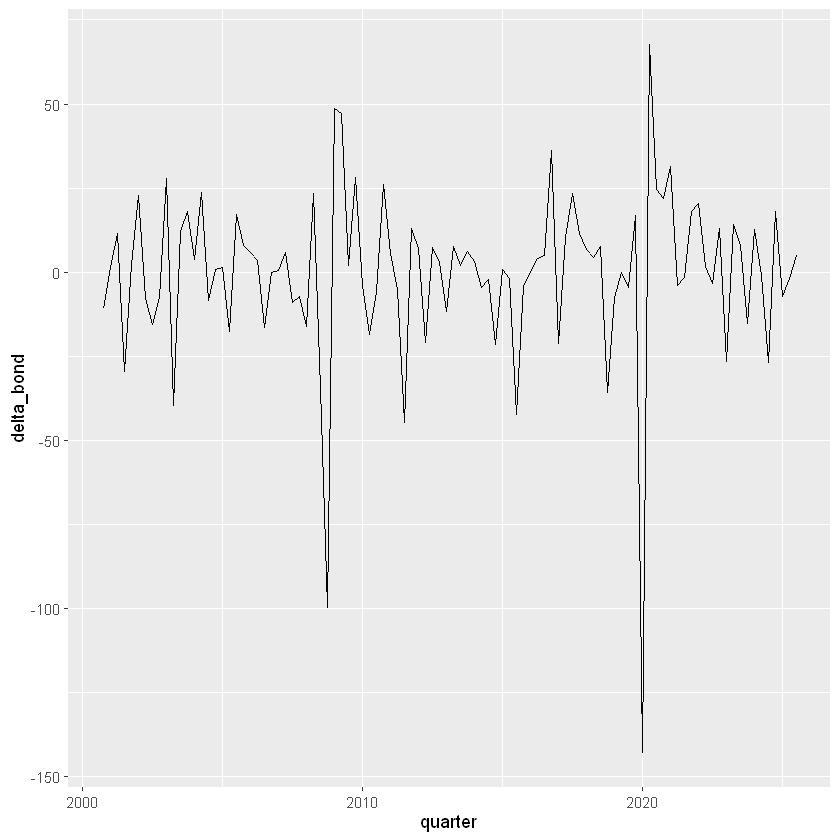

In [330]:
plot <- bond_quarterly|>
ggplot(aes(x=quarter, y=delta_bond))+geom_line()

plot

In [353]:
# Process CPI (monthly percent change)
cpi_monthly <- cpi_vec |>
  dplyr::select(Date, VALUE) |>
  dplyr::mutate(month = Date) |>
  dplyr::mutate(
    delta_cpi = VALUE) |>
  dplyr::select(month, delta_cpi) |>
  tidyr::drop_na()

trade_commodities_monthly <- trade_commodities |>
  dplyr::select(date, value) |>
  dplyr::mutate(month = date) |>
  dplyr::mutate(
    trade_us_canada = value) |>
  dplyr::select(month, trade_us_canada ) |>
  tidyr::drop_na()

# Process Exchange Rate (quarterly percent change)
# exc_quarterly <- exc_vec |>
#   dplyr::select(Date, VALUE) |>
#   dplyr::mutate(quarter = lubridate::floor_date(Date, "quarter")) |>
#   dplyr::group_by(quarter) |>
#   dplyr::summarise(VALUE = dplyr::last(VALUE), .groups = 'drop') |>
#   dplyr::filter(quarter >= start_date) |> #
#   dplyr::mutate(
#     delta_exc = (log(VALUE) - log(dplyr::lag(VALUE, 1))) * 100
#   ) |>
#   dplyr::select(quarter, delta_exc) |>
#   tidyr::drop_na()

# Process Unemployment (using the rate level)
unemp_monthly <- unemp_vec |>
  dplyr::select(Date, VALUE) |>
  dplyr::mutate(month = lubridate::floor_date(Date, "month")) |>
  dplyr::filter(month >= start_date) |>
  # Using the unemployment rate level directly
  dplyr::mutate(
    delta_unemp = (log(VALUE) - log(dplyr::lag(VALUE, 1))) * 100
  ) |>
  dplyr::select(month, delta_unemp) |>
  tidyr::drop_na()


exc_monthly <- exc_rate |>
rename(month = date)|>
rename(delta_exc = value)|>
dplyr::select(month, delta_exc)|>
tidyr::drop_na()

In [354]:
combine_processed_dfs <- function(...) {
  list_of_dfs <- list(...)
  combined_df <- purrr::reduce(list_of_dfs, dplyr::inner_join, by = "month")
  return(combined_df)
}

# Example of how to use it:
final_monthly_df <- combine_processed_dfs(
  gdp_monthly,
  oil_monthly,
  cpi_monthly,
  exc_monthly,
  unemp_monthly,
  bond_monthly,
  trade_commodities_monthly
)

glimpse(final_monthly_df)

Rows: 232
Columns: 8
$ month           <date> 2006-02-01, 2006-03-01, 2006-04-01, 2006-05-01, 2006-…
$ delta_gdp       <dbl> 0.21771034, 0.22756164, 0.02124890, 0.04712989, -0.161…
$ delta_oil       <dbl> -7.65400771, 5.84832934, 12.95040010, -1.51805572, -0.…
$ delta_cpi       <dbl> 1.7, 1.8, 1.7, 1.9, 1.7, 2.0, 2.2, 2.3, 2.4, 2.5, 2.5,…
$ delta_exc       <dbl> -0.008270263, 0.008413959, -0.013203696, -0.034114091,…
$ delta_unemp     <dbl> -1.503788, -1.526747, 0.000000, -4.725288, 1.600034, 3…
$ delta_bond      <dbl> 3.442022e+00, -7.547206e-01, 3.352269e+00, -4.112729e+…
$ trade_us_canada <dbl> 99400000, -1362800000, -444900000, -185100000, 1367000…


In [333]:
# long_term_mean_unemp <- mean(final_monthly_df$delta_unemp, na.rm = TRUE)

# # Optional: Print the mean to see the calculated "natural rate"
# print(paste("Long-Term Mean Unemployment Rate:", round(long_term_mean_unemp, 2)))

# final_monthly_df <- final_monthly_df|>
# mutate(market_slack = delta_unemp - long_term_mean_unemp)|>
# dplyr::select(!delta_unemp)
# # 3. View the result
# glimpse(final_monthly_df)

In [351]:
adf.test(na.omit(cpi_vec$VALUE))
adf.test(na.omit(cpi_monthly$delta_cpi))
adf.test(na.omit(trade_commodities$value))


	Augmented Dickey-Fuller Test

data:  na.omit(cpi_vec$VALUE)
Dickey-Fuller = -3.2008, Lag order = 6, p-value = 0.08812
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  na.omit(cpi_monthly$delta_cpi)
Dickey-Fuller = -3.2008, Lag order = 6, p-value = 0.08812
alternative hypothesis: stationary


Warning message in adf.test(na.omit(trade_commodities$value)):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  na.omit(trade_commodities$value)
Dickey-Fuller = -8.4215, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


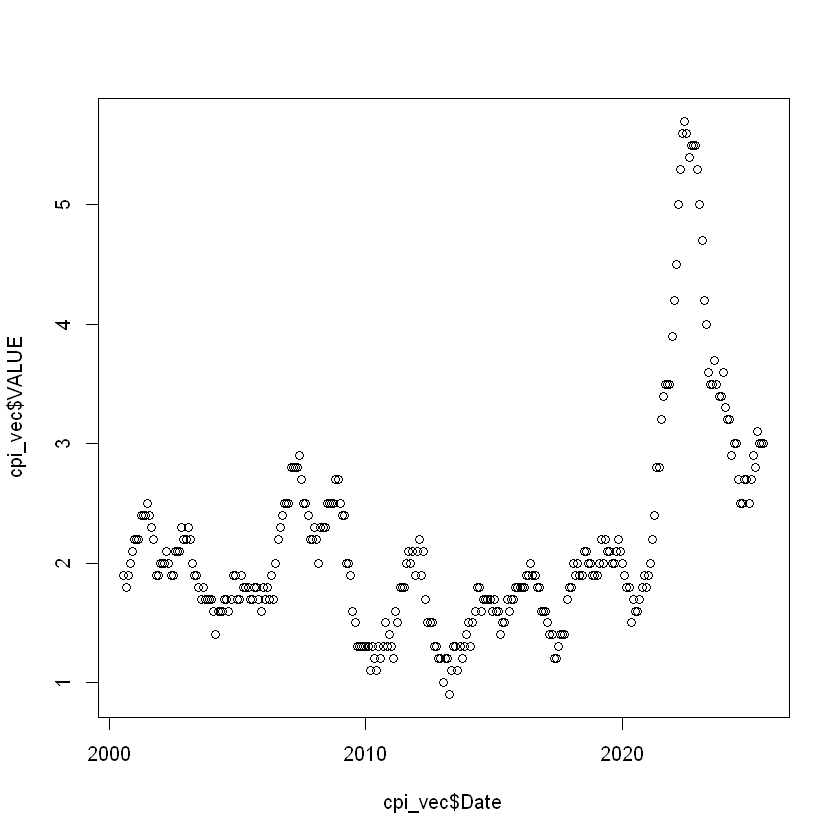

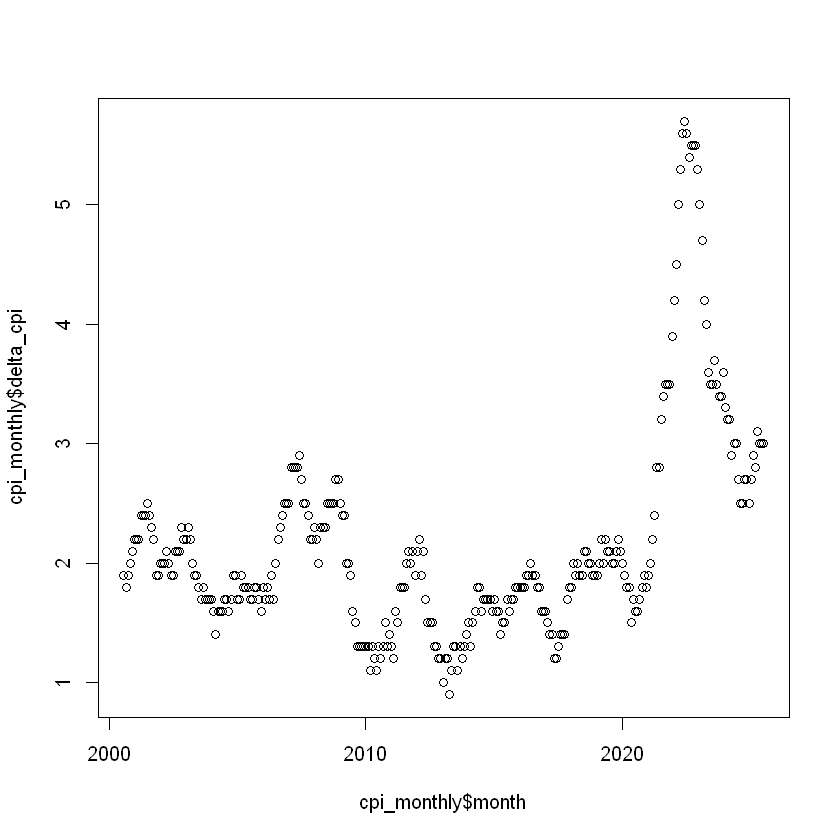

In [335]:
plot(cpi_vec$Date, cpi_vec$VALUE)
plot(cpi_monthly$month, cpi_monthly$delta_cpi)

In [336]:
adf.test(na.omit(final_monthly_df$delta_cpi))
adf.test(na.omit(final_monthly_df$delta_gdp))
adf.test(na.omit(final_monthly_df$delta_oil))
adf.test(na.omit(final_monthly_df$delta_exc))
# adf.test(na.omit(final_monthly_df$market_slack))
# adf.test(na.omit(final_monthly_df$delta_ulc))
adf.test(na.omit(final_monthly_df$delta_bond))
# adf.test(na.omit(final_monthly_df$delta_unemp))


	Augmented Dickey-Fuller Test

data:  na.omit(final_monthly_df$delta_cpi)
Dickey-Fuller = -3.0569, Lag order = 6, p-value = 0.1318
alternative hypothesis: stationary


Warning message in adf.test(na.omit(final_monthly_df$delta_gdp)):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  na.omit(final_monthly_df$delta_gdp)
Dickey-Fuller = -6.8437, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(na.omit(final_monthly_df$delta_oil)):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  na.omit(final_monthly_df$delta_oil)
Dickey-Fuller = -7.3781, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(na.omit(final_monthly_df$delta_exc)):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  na.omit(final_monthly_df$delta_exc)
Dickey-Fuller = -5.8463, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(na.omit(final_monthly_df$delta_bond)):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  na.omit(final_monthly_df$delta_bond)
Dickey-Fuller = -6.6808, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


In [ ]:
df_for_lags <- final_monthly_df|>
dplyr::select(delta_cpi, delta_exc, delta_gdp, delta_oil, delta_bond, tra)
lag_selection <- VARselect(df_for_lags, lag.max = 30, type = "const")

print(lag_selection$selection)

AIC(n)  HQ(n)  SC(n) FPE(n) 
    30      1      1      3 


In [358]:
var_data <- final_monthly_df |>
  dplyr::select(delta_cpi, delta_exc, delta_gdp, delta_oil, delta_bond, trade_us_canada)|>
 ts(start = c(2001, 1), frequency = 12)

In [357]:
var_model_2 <- VAR(var_data, p = 2, type = "const")
var_model_4 <- VAR(var_data, p = 4, type = "const")

summary_2 <- summary(var_model_2)
summary_4 <- summary(var_model_4)
print(summary_2$varresult$delta_cpi)
print(summary_4$varresult$delta_cpi)

ERROR: Error in solve.default(Sigma): system is computationally singular: reciprocal condition number = 1.87165e-22


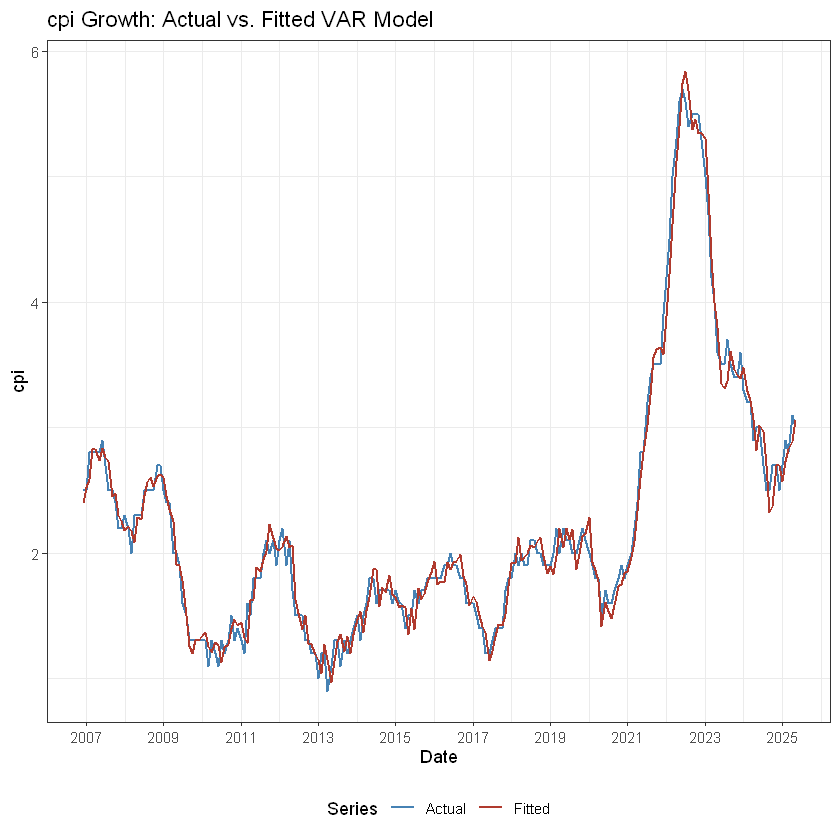

In [340]:
library(scales) # Needed for date formatting

# Get the number of lags (p) from your model
p <- var_model_4$p

# Create the data frame using the 'month' column from your original full_df
# Make sure your original data frame is named 'full_df'
plot_df <- data.frame(
  date       = final_monthly_df$month[-(1:p)],
  actual_cpi = final_monthly_df$delta_cpi[-(1:p)],
  fitted_cpi = as.numeric(fitted(var_model_4)[, "delta_cpi"])
)

# Reshape the data (this part is unchanged)
plot_long_df <- plot_df |>
  pivot_longer(
    cols = c("actual_cpi", "fitted_cpi"),
    names_to = "type",
    values_to = "value"
  ) |>
  mutate(
    type = recode(type, "actual_cpi" = "Actual", "fitted_cpi" = "Fitted")
  )

# Create the plot, using 'date' on the x-axis
ggplot(plot_long_df, aes(x = date, y = value, color = type)) +
  geom_line(linewidth = 0.8) +
  scale_color_manual(values = c("Actual" = "steelblue", "Fitted" = "#b03a2e")) +
  
  # Add this line to customize the date axis format
  scale_x_date(date_breaks = "2 years", date_labels = "%Y") +
  
  labs(
    title = "cpi Growth: Actual vs. Fitted VAR Model",
    x = "Date", # Updated x-axis label
    y = "cpi",
    color = "Series"
  ) +
  theme_bw() +
  theme(legend.position = "bottom")

In [341]:
 install.packages("corrplot")

Warning message:
"package 'corrplot' is in use and will not be installed"


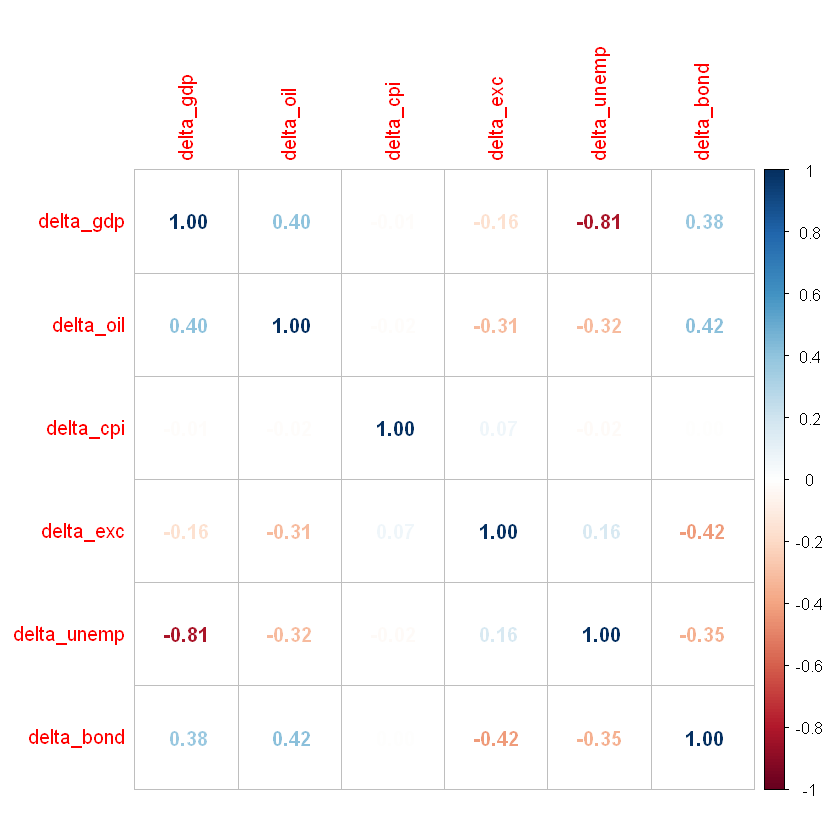

In [342]:
library(corrplot)

numeric_df <- final_monthly_df |>
  dplyr::select(where(is.numeric))
correlation_matrix <- cor(numeric_df, use = "complete.obs")

corrplot(correlation_matrix, method = "number")

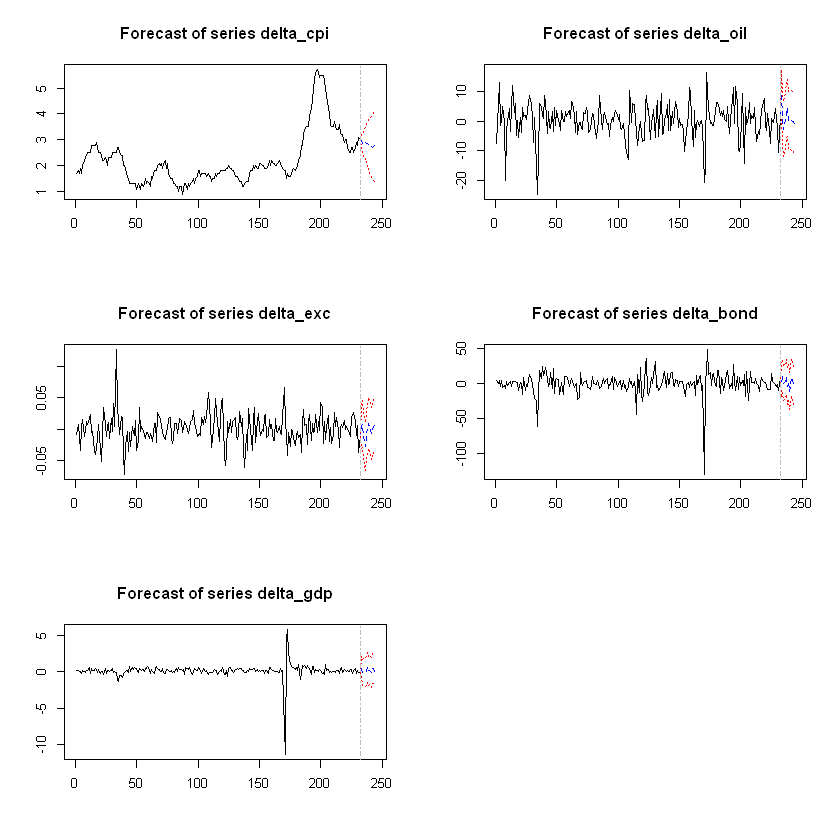

In [343]:
# 1. Create a forecast object (e.g., for the next 12 quarters)
forecast_results <- predict(var_model_4, n.ahead = 12, ci = 0.90)

# 2. Plot the forecast
plot(forecast_results)

In [344]:
arch_test_result <- arch.test(var_model_2, lags.multi = 5)

# Print the results
print(arch_test_result)


	ARCH (multivariate)

data:  Residuals of VAR object var_model_2
Chi-squared = 1394.5, df = 1125, p-value = 5.919e-08



$arch.mul

	ARCH (multivariate)

data:  Residuals of VAR object var_model_2
Chi-squared = 1394.5, df = 1125, p-value = 5.919e-08



In [345]:
# Let's assume the columns in your var_data are in this order:
# 1. delta_gdp
# 2. delta_cpi
# 3. ... and so on for 5 variables total.

# --- Case 2: Stagflation Scenario ---
# Forecast horizon
n_ahead <- 12
# Number of variables
n_vars <- 5

# Create a matrix of NAs
scenario_stagflation <- matrix(NA, nrow = n_ahead, ncol = n_vars)

# Constrain delta_gdp (col 1) to be -0.5% for the first 3 months
scenario_stagflation[1:3, 1] <- -0.3

# Constrain delta_cpi (col 2) to be +0.7% for the first 3 months
scenario_stagflation[1:3, 2] <- 0.2


# --- Case 3: Recession Scenario ---
scenario_recession <- matrix(NA, nrow = n_ahead, ncol = n_vars)

# Constrain delta_gdp (col 1) to be -1.0% for the first 4 months
scenario_recession[1:4, 1] <- -1.0

# Constrain delta_cpi (col 2) to be -0.2% for the first 4 months
scenario_recession[1:4, 2] <- -0.2

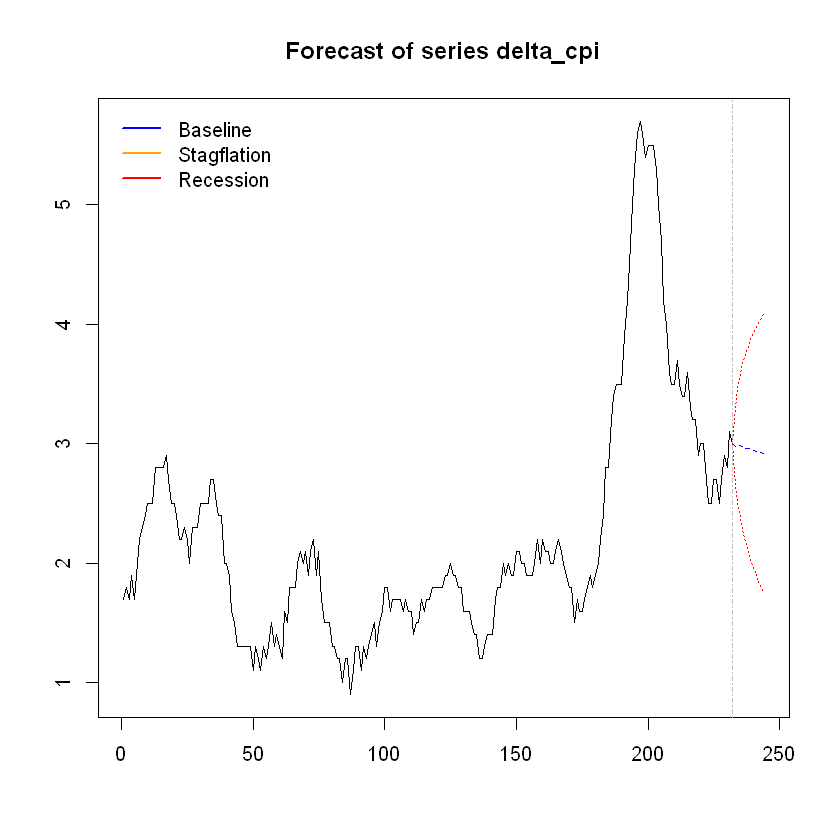

In [346]:
# Assumes 'var_model_2' is your fitted VAR object
library(vars)

# Case 1: Baseline Forecast (no constraints)
forecast_baseline <- predict(var_model_2, n.ahead = n_ahead)

# Case 2: Stagflation Forecast (with constraints)
forecast_stagflation <- predict(var_model_2, n.ahead = n_ahead, dumvar = scenario_stagflation)

# Case 3: Recession Forecast (with constraints)
forecast_recession <- predict(var_model_2, n.ahead = n_ahead, dumvar = scenario_recession)


# --- Visualize the Scenarios for GDP ---
# Plot the baseline forecast for delta_gdp (the first variable)
plot(forecast_baseline, names = "delta_cpi")

# Add the Stagflation scenario path
lines(1:n_ahead, forecast_stagflation$fcst$delta_cpi[, "fcst"], col = "orange", lwd = 2)

# Add the Recession scenario path
lines(1:n_ahead, forecast_recession$fcst$delta_cpi[, "fcst"], col = "red", lwd = 2)

legend("topleft", legend = c("Baseline", "Stagflation", "Recession"),
       col = c("blue", "orange", "red"), lty = 1, lwd = 2, bty = "n")